<a href="https://colab.research.google.com/github/helloaliimran/CNN-SignLanguageDigitsRecognition/blob/master/CNN_Sign_language_Digits_Recogniation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras import layers
from keras import optimizers
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [0]:
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D


In [0]:
#Load Images
X = np.load("/content/drive/My Drive/Colab Notebooks/Sign-language-digits-dataset/X.npy")
#Data is 2062 x 64 x 64 matrix

#input image dimensions
img_x, img_y = 64, 64

#Load labels - One hot encoded: 2062 x 10
Y = np.load("/content/drive/My Drive/Colab Notebooks/Sign-language-digits-dataset/Y.npy")

#spliting data in to train and test
x_train, x_test, y_train, y_test= train_test_split(X,Y,test_size=0.3)


In [24]:
print(X.shape)
print(Y.shape)
print(x_train.shape)
print(y_train.shape)

(2062, 64, 64)
(2062, 10)
(1443, 64, 64)
(1443, 10)


In [8]:
print(y_train.shape)
print(x_train.shape)

(1443, 10, 10)
(1443, 64, 64)


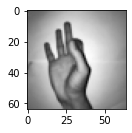

In [0]:
sample_image = X[0,:,:]
plt.subplot(221)
plt.imshow(sample_image, cmap="gray")

In [0]:
sample_image = X[1000,:,:]
plt.subplot(223)
plt.xlabel(Y)
plt.imshow(sample_image, cmap="gray")

In [0]:
sample_image = X[2000,:,:]
plt.subplot(224)
plt.imshow(sample_image, cmap="gray")

In [0]:
#normalize data one hot encoding
from keras.utils import to_categorical 
classes=10

x_train=x_train.reshape(x_train.shape[0],img_x,img_y,1)
x_test=x_test.reshape(x_test.shape[0],img_x,img_y,1)
input_shape=(img_x,img_y,1)

#y_test= to_categorical(y_test,classes)
#y_train= to_categorical(y_train,classes)

# x_train=x_train.astype(float)
# x_test=x_test.astype(float)

#x_train=x_train/255
#x_test=x_test/255


In [26]:
print(y_train.shape)
print(x_train.shape)

(1443, 10)
(1443, 64, 64, 1)


In [27]:
seed=10
np.random.seed(seed)

model = Sequential()
model.add(Conv2D(64,kernel_size=(5,5),padding='same',activation='relu',input_shape=(64,64,1)))
model.add(MaxPooling2D((2,2)))
# model.add(Conv2D(64,(5,5),activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=  model.fit(x_train,y_train,batch_size=10,epochs=10,verbose=1)

Epoch 1/10
1443/1443 [==============================] - 21s 15ms/step - loss: 2.5066 - accuracy: 0.1379
Epoch 2/10
1443/1443 [==============================] - 21s 15ms/step - loss: 1.7796 - accuracy: 0.4241
Epoch 3/10
1443/1443 [==============================] - 21s 15ms/step - loss: 0.9363 - accuracy: 0.7131
Epoch 4/10
1443/1443 [==============================] - 21s 15ms/step - loss: 0.5897 - accuracy: 0.8157
Epoch 5/10
1443/1443 [==============================] - 21s 15ms/step - loss: 0.4416 - accuracy: 0.8718
Epoch 6/10
1443/1443 [==============================] - 22s 15ms/step - loss: 0.3363 - accuracy: 0.8981
Epoch 7/10
1443/1443 [==============================] - 21s 15ms/step - loss: 0.2773 - accuracy: 0.9217
Epoch 8/10
1443/1443 [==============================] - 21s 15ms/step - loss: 0.2089 - accuracy: 0.9446
Epoch 9/10
1443/1443 [==============================] - 21s 15ms/step - loss: 0.1584 - accuracy: 0.9584
Epoch 10/10
1443/1443 [==============================] - 21s 15m

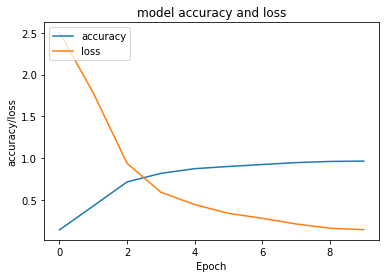

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy and loss')
plt.xlabel('Epoch')
plt.ylabel('accuracy/loss')
plt.legend(['accuracy','loss'], loc='upper left')
plt.show()

Epoch 1/10
1443/1443 [==============================] - 40s 28ms/step - loss: 2.1124 - accuracy: 0.2121
Epoch 2/10
1443/1443 [==============================] - 40s 28ms/step - loss: 0.7493 - accuracy: 0.7554
Epoch 3/10
1443/1443 [==============================] - 40s 28ms/step - loss: 0.4113 - accuracy: 0.8725
Epoch 4/10
1443/1443 [==============================] - 40s 28ms/step - loss: 0.2504 - accuracy: 0.9252
Epoch 5/10
1443/1443 [==============================] - 40s 28ms/step - loss: 0.1298 - accuracy: 0.9612
Epoch 6/10
1443/1443 [==============================] - 40s 28ms/step - loss: 0.0828 - accuracy: 0.9813
Epoch 7/10
1443/1443 [==============================] - 40s 28ms/step - loss: 0.0384 - accuracy: 0.9924
Epoch 8/10
1443/1443 [==============================] - 40s 28ms/step - loss: 0.0203 - accuracy: 0.9945
Epoch 9/10
1443/1443 [==============================] - 40s 28ms/step - loss: 0.0091 - accuracy: 0.9986
Epoch 10/10
1443/1443 [==============================] - 40s 28m

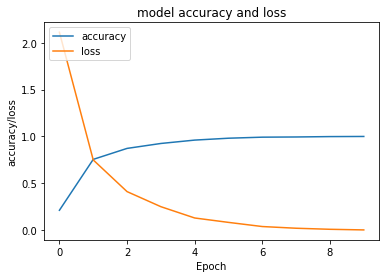

In [30]:
model = Sequential()
model.add(Conv2D(64,kernel_size=(5,5),padding='same',activation='relu',input_shape=(64,64,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=  model.fit(x_train,y_train,batch_size=10,epochs=10,verbose=1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy and loss')
plt.xlabel('Epoch')
plt.ylabel('accuracy/loss')
plt.legend(['accuracy','loss'], loc='upper left')
plt.show()

Epoch 1/50
1443/1443 [==============================] - 34s 24ms/step - loss: 2.3788 - accuracy: 0.1074
Epoch 2/50
1443/1443 [==============================] - 34s 23ms/step - loss: 2.2896 - accuracy: 0.2058
Epoch 3/50
1443/1443 [==============================] - 34s 23ms/step - loss: 2.1402 - accuracy: 0.3001
Epoch 4/50
1443/1443 [==============================] - 34s 24ms/step - loss: 1.5942 - accuracy: 0.5405
Epoch 5/50
1443/1443 [==============================] - 34s 24ms/step - loss: 1.0612 - accuracy: 0.6334
Epoch 6/50
1443/1443 [==============================] - 34s 24ms/step - loss: 0.8177 - accuracy: 0.7200
Epoch 7/50
1443/1443 [==============================] - 34s 24ms/step - loss: 0.6738 - accuracy: 0.7782
Epoch 8/50
1443/1443 [==============================] - 34s 24ms/step - loss: 0.5896 - accuracy: 0.8143
Epoch 9/50
1443/1443 [==============================] - 34s 24ms/step - loss: 0.5218 - accuracy: 0.8371
Epoch 10/50
1443/1443 [==============================] - 34s 24m

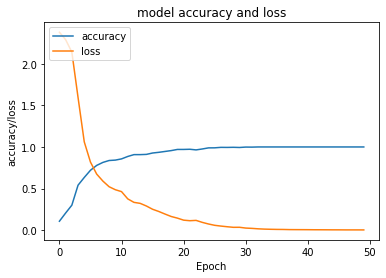

In [31]:
model = Sequential()
model.add(Conv2D(64,kernel_size=(5,5),padding='same',activation='relu',input_shape=(64,64,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=  model.fit(x_train,y_train,batch_size=128,epochs=50,verbose=1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy and loss')
plt.xlabel('Epoch')
plt.ylabel('accuracy/loss')
plt.legend(['accuracy','loss'], loc='upper left')
plt.show()

In [32]:
score = model.evaluate(x_test,y_test,verbose=0)
print('test loss: ',score[0])
print('test accuracy: ',score[1])

test loss:  0.5291094831965851
test accuracy:  0.8933764100074768


In [0]:

#change the data set ration

#spliting data in to train and test
x_train, x_test, y_train, y_test= train_test_split(X,Y,test_size=0.2)
x_train=x_train.reshape(x_train.shape[0],img_x,img_y,1)
x_test=x_test.reshape(x_test.shape[0],img_x,img_y,1)
input_shape=(img_x,img_y,1)

In [7]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(64,64,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=  model.fit(x_train,y_train,batch_size=128,epochs=50,verbose=1)


Epoch 1/50
1649/1649 [==============================] - 13s 8ms/step - loss: 2.3043 - accuracy: 0.1134
Epoch 2/50
1649/1649 [==============================] - 13s 8ms/step - loss: 2.2555 - accuracy: 0.1649
Epoch 3/50
1649/1649 [==============================] - 13s 8ms/step - loss: 1.7760 - accuracy: 0.4178
Epoch 4/50
1649/1649 [==============================] - 13s 8ms/step - loss: 1.0838 - accuracy: 0.6543
Epoch 5/50
1649/1649 [==============================] - 13s 8ms/step - loss: 0.7629 - accuracy: 0.7647
Epoch 6/50
1649/1649 [==============================] - 13s 8ms/step - loss: 0.6022 - accuracy: 0.8102
Epoch 7/50
1649/1649 [==============================] - 13s 8ms/step - loss: 0.4996 - accuracy: 0.8381
Epoch 8/50
1649/1649 [==============================] - 13s 8ms/step - loss: 0.4107 - accuracy: 0.8690
Epoch 9/50
1649/1649 [==============================] - 13s 8ms/step - loss: 0.3358 - accuracy: 0.8914
Epoch 10/50
1649/1649 [==============================] - 13s 8ms/step - l

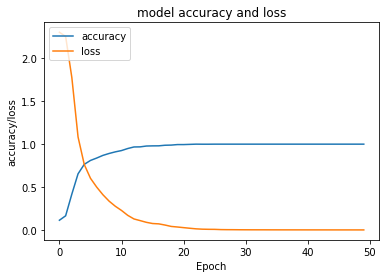

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy and loss')
plt.xlabel('Epoch')
plt.ylabel('accuracy/loss')
plt.legend(['accuracy','loss'], loc='upper left')
plt.show()

In [9]:
score = model.evaluate(x_test,y_test,verbose=0)
print('test loss: ',score[0])
print('test accuracy: ',score[1])

test loss:  0.3906157657540162
test accuracy:  0.9322034120559692


In [13]:
print(history.history.keys())
print(score)

dict_keys(['loss', 'accuracy'])
[0.3906157657540162, 0.9322034120559692]


In [14]:
model = Sequential()
model.add(Conv2D(16,kernel_size=(3,3),padding='same',activation='relu',input_shape=(64,64,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=  model.fit(x_train,y_train,batch_size=128,epochs=50,verbose=1)

Epoch 1/50
1649/1649 [==============================] - 5s 3ms/step - loss: 2.3038 - accuracy: 0.0934
Epoch 2/50
1649/1649 [==============================] - 5s 3ms/step - loss: 2.2637 - accuracy: 0.2317
Epoch 3/50
1649/1649 [==============================] - 5s 3ms/step - loss: 2.0070 - accuracy: 0.3766
Epoch 4/50
1649/1649 [==============================] - 5s 3ms/step - loss: 1.3842 - accuracy: 0.5834
Epoch 5/50
1649/1649 [==============================] - 5s 3ms/step - loss: 0.9279 - accuracy: 0.6859
Epoch 6/50
1649/1649 [==============================] - 5s 3ms/step - loss: 0.7012 - accuracy: 0.7641
Epoch 7/50
1649/1649 [==============================] - 5s 3ms/step - loss: 0.5889 - accuracy: 0.8047
Epoch 8/50
1649/1649 [==============================] - 5s 3ms/step - loss: 0.5259 - accuracy: 0.8290
Epoch 9/50
1649/1649 [==============================] - 5s 3ms/step - loss: 0.4994 - accuracy: 0.8375
Epoch 10/50
1649/1649 [==============================] - 5s 3ms/step - loss: 0.430

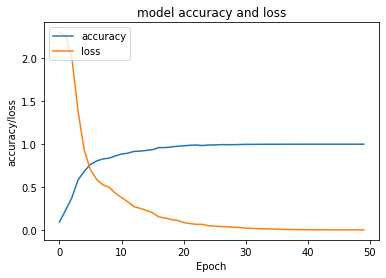

test loss:  0.3822641077363462
test accuracy:  0.9225181341171265


In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy and loss')
plt.xlabel('Epoch')
plt.ylabel('accuracy/loss')
plt.legend(['accuracy','loss'], loc='upper left')
plt.show()

score2 = model.evaluate(x_test,y_test,verbose=0)
print('test loss: ',score2[0])
print('test accuracy: ',score2[1])